## References

https://machinelearningmastery.com/feature-selection-with-categorical-data/

## Import necessary packages

In [25]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [155]:
import sweetviz

Read Data

In [69]:
# names of columns, as per description
cols_names = ['age', 'menopause', 'tumor-size', 
              'inv-nodes', 'node-caps', 'deg-malig', 'breast', 
              'breast-quad', 'irradiat', 'target']

In [68]:
len(cols_names)

9

In [70]:
file_path = r'C:\my-drive\git-repos\my-learning\ml-playlist\data\breast_cancer.csv'
df = pd.read_csv(file_path, header=None)

<IPython.core.display.Javascript object>

In [71]:
df.shape

(286, 10)

In [72]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'


In [98]:
df.columns = cols_names
df.head(2)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'


In [99]:
df.shape

(286, 10)

In [100]:
df.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
target         object
dtype: object

Analyze Data

In [157]:
my_report = sweetviz.analyze([df, 'train'])

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


In [159]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [101]:
#retrieve numpy array
data = df.values
data.shape

(286, 10)

In [102]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
target         0
dtype: int64

In [103]:
df1 = df.dropna()
df1.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
target         0
dtype: int64

In [104]:
df.shape, df1.shape

((286, 10), (277, 10))

In [105]:
data = df1
data

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [106]:
type(data)

pandas.core.frame.DataFrame

In [107]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [108]:
X.shape, y.shape

((277, 9), (277,))

we can force all fields in the input data to be string, just in case Pandas tried to map some automatically to numbers

In [56]:
X = X.astype('str')
X

,0,1,2,3,4,5,6,7,8
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'
...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no'


In [109]:
y

0         'recurrence-events'
1      'no-recurrence-events'
2         'recurrence-events'
3      'no-recurrence-events'
4         'recurrence-events'
                ...          
281    'no-recurrence-events'
282    'no-recurrence-events'
283    'no-recurrence-events'
284    'no-recurrence-events'
285    'no-recurrence-events'
Name: target, Length: 277, dtype: object

Do Train Test Split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
len(X_train), len(X_test), len(y_train), len(y_test)

(221, 56, 221, 56)

Orginal Encoder

In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [136]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
oe.fit(X_train)

<IPython.core.display.Javascript object>

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [137]:
X_train_oe = oe.transform(X_train)

In [138]:
X_test_oe = oe.transform(X_test)

In [141]:
X_train_oe.shape, X_train_oe.T.shape

((221, 9), (9, 221))

In [142]:
X_test_oe.shape

(56, 9)

In [144]:
X_test_oe

array([[ 2.,  0.,  4.,  0.,  0.,  2.,  0.,  4.,  0.],
       [ 1.,  2.,  5.,  0.,  0.,  2.,  1.,  4.,  0.],
       [ 1.,  0.,  5.,  0.,  0.,  1.,  0.,  2.,  1.],
       [ 1.,  2.,  7.,  0.,  0.,  1.,  1.,  1.,  0.],
       [ 1.,  2.,  3.,  4.,  1.,  1.,  1.,  4.,  1.],
       [ 1.,  2.,  5.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 3.,  0.,  3.,  0.,  0.,  1.,  0.,  2.,  0.],
       [ 1.,  2.,  3.,  4.,  0.,  1.,  1.,  1.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 2.,  0.,  2.,  0.,  0.,  1.,  1.,  4.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 4.,  0.,  7.,  0.,  0.,  0.,  1.,  2.,  0.],
       [ 1.,  2.,  5.,  1.,  1.,  2.,  0.,  2.,  1.],
       [ 2.,  2.,  4.,  0.,  0.,  1.,  0.,  4.,  0.],
       [ 2.,  0.,  5.,  5.,  1.,  1.,  0.,  1.,  0.],
       [ 1.,  2.,  5.,  0.,  1.,  2.,  1.,  4.,  0.],
       [ 0.,  2.,  9.,  0.,  0.,  1.,  0.,  3.,  0.],
       [ 1.,  0.,  3.,  0.,  0.,  1.,  1.,  2.,  0.],
       [ 1.,  2.,  4.,  0., 

In [148]:
oe.categories_

[array(["'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
       dtype=object),
 array(["'ge40'", "'lt40'", "'premeno'"], dtype=object),
 array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object),
 array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
        "'9-11'"], dtype=object),
 array(["'no'", "'yes'"], dtype=object),
 array(["'1'", "'2'", "'3'"], dtype=object),
 array(["'left'", "'right'"], dtype=object),
 array(["'central'", "'left_low'", "'left_up'", "'right_low'",
        "'right_up'"], dtype=object),
 array(["'no'", "'yes'"], dtype=object)]

Label Encoder

In [149]:
le = LabelEncoder()

In [150]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'target'],
      dtype='object')

In [152]:
df.target.unique()

array(["'recurrence-events'", "'no-recurrence-events'"], dtype=object)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='Count'>

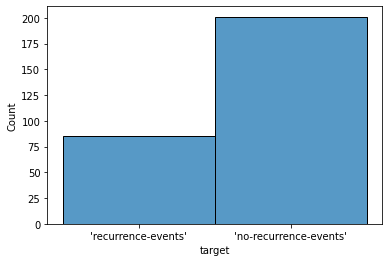

In [154]:
sns.histplot(df.target)

Check One Hot Encoder

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [127]:
X_train_enc = ohe.fit_transform(X_train)

In [122]:
ohe.categories_

[array(["'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
       dtype=object),
 array(["'ge40'", "'lt40'", "'premeno'"], dtype=object),
 array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object),
 array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
        "'9-11'"], dtype=object),
 array(["'no'", "'yes'"], dtype=object),
 array(["'1'", "'2'", "'3'"], dtype=object),
 array(["'left'", "'right'"], dtype=object),
 array(["'central'", "'left_low'", "'left_up'", "'right_low'",
        "'right_up'"], dtype=object),
 array(["'no'", "'yes'"], dtype=object)]

In [115]:
X_train1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [116]:
X_train1.shape

(221, 40)

In [119]:
X_test1 = ohe.transform(X_test)
X_test1

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [120]:
X_test1.shape

(56, 40)

Ordinal Encoder - Expects, n_samples, n_features
- Used for features
- Where order is important
- Cold - 0, Warm - 2, Hot - 1
- We can specify the order of importance also, if we know.

In [60]:
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train)

OrdinalEncoder()

In [53]:
X_train_enc = ord_enc.transform(X_train)


In [97]:
cat_features = ['color', 'director_name', 'actor_2_name']
enc = OneHotEncoder(cat_features)
enc.fit(X_train.values)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [117]:
X_test

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
32,'50-59','ge40','25-29','0-2','no','3','left','right_up','no'
132,'40-49','premeno','30-34','0-2','no','3','right','right_up','no'
227,'40-49','ge40','30-34','0-2','no','2','left','left_up','yes'
148,'40-49','premeno','40-44','0-2','no','2','right','left_low','no'
263,'40-49','premeno','20-24','3-5','yes','2','right','right_up','yes'
244,'40-49','premeno','30-34','0-2','no','1','left','left_low','no'
103,'60-69','ge40','20-24','0-2','no','2','left','left_up','no'
222,'40-49','premeno','20-24','3-5','no','2','right','left_low','no'
265,'50-59','ge40','0-4','0-2','no','2','left','central','no'
151,'50-59','ge40','15-19','0-2','no','2','right','right_up','no'


In [118]:
X_test_enc = ord_enc.transform(X_test)

ValueError: Found unknown categories ["'20-29'"] in column 0 during transform

In [ ]:
np.where('nan', 'None', )